In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv('Train_v2.csv')
variables = pd.read_csv('VariableDefinitions.csv')
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [4]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


Text(0.5, 0, 'have account or no')

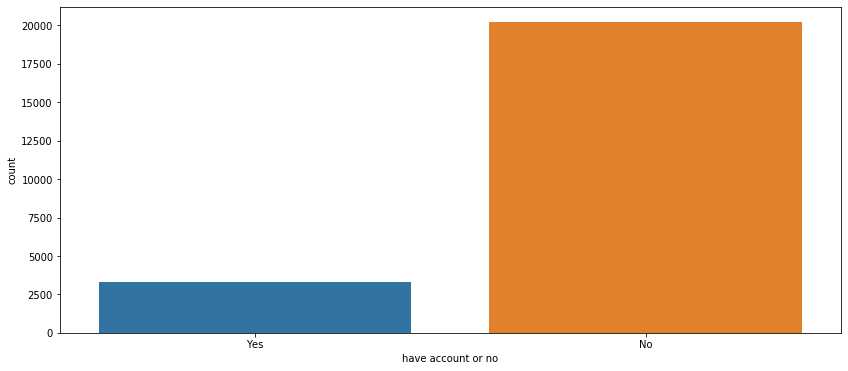

In [5]:

plt.figure(figsize=(14,6))
sns.countplot(data['bank_account'])
plt.xlabel('have account or no')

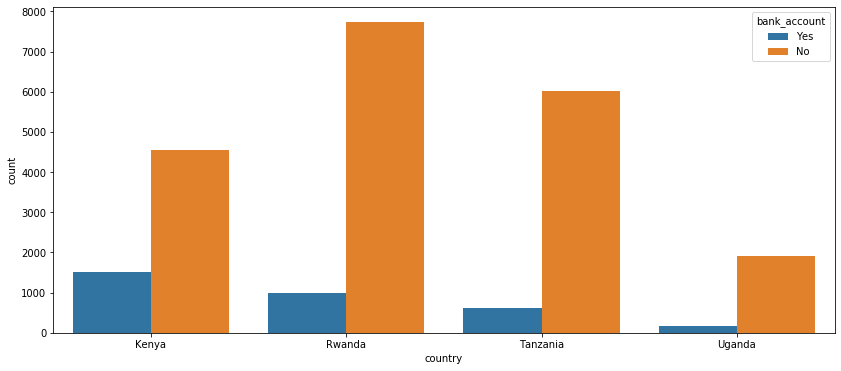

In [6]:
plt.figure(figsize=(14,6))
sns.countplot(data["country"],hue=data["bank_account"])

In [7]:
a=len( data[(data.country=='Rwanda')])
print(a)

8735


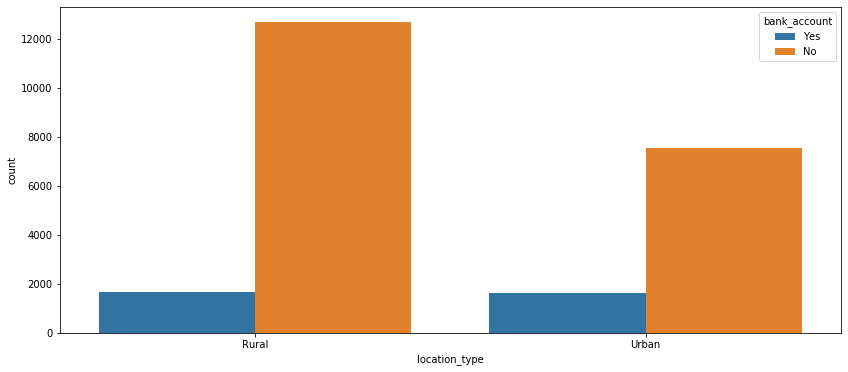

In [8]:
plt.figure(figsize=(14,6))
sns.countplot(data["location_type"],hue=data["bank_account"])

# Data Preprocessing

In [9]:
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]
cols_with_missing

[]

In [10]:
#dealing with categorical values 
new_coloumn=[]
for value in data['bank_account']:
    if (value=="Yes"): 
        new_coloumn.append(1)
    else:
        new_coloumn.append(0)
data['bank_account']=new_coloumn

In [11]:
#coverting yes / no values to 1 0 : 
def convert_boolean_data(name):
    new_coloumn=[]
    values = data[name].unique()
    for value in data[name]:
        if (value==values[0]): 
            new_coloumn.append(1)
        else:
            new_coloumn.append(0)
    data[name]=new_coloumn

In [12]:
cols_two_unique_values=['location_type', 'cellphone_access', 'gender_of_respondent']

In [13]:
for name in cols_two_unique_values:
    convert_boolean_data(name)

In [14]:
#deleting unique_id coloumn : 
data=data.drop('uniqueid',axis=1)

In [15]:
data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,1,1,3,24,1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,1,0,5,70,1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,0,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,1,1,5,34,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,0,0,8,26,0,Child,Single/Never Married,Primary education,Informally employed


In [16]:
#dealing with country 

#dealing with relationship_with_head , marital_status,education_level and job_type using one hot encoder
object_cols=['relationship_with_head','marital_status','education_level','job_type']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols= pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))

# One-hot encoding removed index:
OH_cols.index = data.index
# Remove categorical columns (will replace with one-hot encoding)
num_data = data.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_data = pd.concat([num_data, OH_cols], axis=1)

In [17]:
OH_data.dtypes

country                  object
year                      int64
bank_account              int64
location_type             int64
cellphone_access          int64
household_size            int64
age_of_respondent         int64
gender_of_respondent      int64
0                       float64
1                       float64
2                       float64
3                       float64
4                       float64
5                       float64
6                       float64
7                       float64
8                       float64
9                       float64
10                      float64
11                      float64
12                      float64
13                      float64
14                      float64
15                      float64
16                      float64
17                      float64
18                      float64
19                      float64
20                      float64
21                      float64
22                      float64
23      

In [18]:
X=OH_data.drop('bank_account',axis=1)
y=pd.DataFrame(data['bank_account'],columns=['bank_account'])

In [19]:
y.head()

,bank_account
0,1
1,0
2,1
3,0
4,0


In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=32)

# Training and testing some machine learning models

# Random Forest Classifier 

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
rfc = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [10,100,300, 500],
    'max_depth' : [10,30,60,90],   
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
gs_rfc_fit = CV_rfc.fit(X_train, y_train)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was pa

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was pa

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was pa

In [96]:
gs_rfc_fit.best_params_


{'max_depth': 10, 'n_estimators': 500}

In [104]:
rfc_model=RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=10)

In [105]:
rfc_model.fit(X_train, y_train)


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [106]:
pred=rfc_model.predict(X_test)

In [107]:
print("Accuracy: ",accuracy_score(y_test,pred))


Accuracy:  0.8910456219892321


In [108]:
print("Accuracy: ",accuracy_score(y_test,pred))


Accuracy:  0.8910456219892321


# Support Vector Machine

In [109]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
svc_model=SVC(C=0.01,gamma=0.1)

In [110]:
svc_model.fit(X_train,y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
pred = svc_model.predict(X_test)

In [112]:
print("Accuracy for SVC : ",accuracy_score(y_test,pred))

Accuracy for SVC :  0.8610087843581751


# XGBoost Classifier

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
param_grid = { 
    'n_estimators': [150,300],
    'max_depth' : [10,30], 
    'learning_rate': [0.01,0.1],
}

CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1,verbose=1)
gs_gbc_fit = CV_gbc.fit(X_train, y_train)
gs_gbc_fit.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 24.9min finished
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300}

In [132]:
gbc_model=GradientBoostingClassifier(random_state=42, n_estimators= 3000, max_depth=10,learning_rate=0.01)

In [133]:
gbc_model.fit(X_train,y_train)
pred=gbc_model.predict(X_test)
print("Accuracy for Gradient Boosting Classifier on CV data: ",accuracy_score(y_test,pred))


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Gradient Boosting Classifier on CV data:  0.8607254179654293


In [144]:
from sklearn.neighbors import KNeighborsClassifier
KNNC_model = KNeighborsClassifier(n_neighbors=9,metric='euclidean',weights='distance')
KNNC_model.fit(X_train,y_train)
pred=KNNC_model.predict(X_test)
print("Accuracy for KNN Classifier : ",accuracy_score(y_test,pred))

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy for KNN Classifier :  0.8669594786058373


# Preparing submission file

In [73]:
test = pd.read_csv('Test_v2.csv')

In [74]:
test.shape

(10086, 12)

In [75]:
cols_with_missing = [col for col in test.columns
                     if test[col].isnull().any()]
cols_with_missing

[]

In [76]:
di = {"Kenya":3 , "Rwanda": 2,"Tanzania":1,"Uganda": 0}
test.replace({"country": di},inplace=True)
di = {2018:2 , 2017: 1,2016:0}
test.replace({"year": di},inplace=True)

In [77]:
#converting  values to 1/0 
cols_two_unique_values = [col for col in test.columns
                     if len(test[col].unique())==2]
cols_two_unique_values

['location_type', 'cellphone_access', 'gender_of_respondent']

In [78]:
def convert_boolean_data(name):
    new_coloumn=[]
    values = test[name].unique()
    for value in test[name]:
        if (value==values[0]): 
            new_coloumn.append(1)
        else:
            new_coloumn.append(0)
    test[name]=new_coloumn

In [79]:
for name in cols_two_unique_values:
    convert_boolean_data(name)

In [80]:
uniqueid=test["uniqueid"]

In [81]:
test=test.drop('uniqueid',axis=1)

In [82]:
cols_to_label_encoder=['relationship_with_head','marital_status','education_level','job_type','gender_of_respondent','cellphone_access','location_type']
from sklearn.preprocessing import LabelEncoder
for c in cols_to_label_encoder:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

In [84]:
#applying log to age 
test['log_value'] = np.log(test['age_of_respondent'])
test=test.drop('age_of_respondent',axis=1)
test.head()

,country,year,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,log_value
0,3,2,1,1,3,1,1,2,3,2,3.401197
1,3,2,1,1,7,1,1,2,5,3,3.931826
2,3,2,0,0,3,0,4,2,0,8,4.343805
3,3,2,0,0,6,0,1,2,2,8,3.663562
4,3,2,1,0,3,1,0,3,3,8,2.772589


In [85]:
test.head()

,country,year,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,log_value
0,3,2,1,1,3,1,1,2,3,2,3.401197
1,3,2,1,1,7,1,1,2,5,3,3.931826
2,3,2,0,0,3,0,4,2,0,8,4.343805
3,3,2,0,0,6,0,1,2,2,8,3.663562
4,3,2,1,0,3,1,0,3,3,8,2.772589


In [86]:
test.to_csv('t_label.csv')

In [134]:
res=gbc_model.predict(OH_test)

In [135]:
submission = pd.DataFrame()

In [138]:
test.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,1,3,30,1,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,1,1,7,51,1,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,0,0,3,77,0,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,0,0,6,39,0,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,1,0,3,16,1,Child,Single/Never Married,Secondary education,Remittance Dependent


In [139]:
submission["uniqueid"]=uniqueid+" x "+test['country']

In [140]:
submission["bank_account"]=res

In [141]:

submission.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,0
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [142]:
submission.to_csv('submission.csv',index=False)